**Credit card fraud detection**

In [2]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
pd.set_option('precision', 5)

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,0.36379,0.09079,-0.55160,-0.61780,-0.99139,-0.31117,1.46818,-0.47040,0.20797,0.02579,0.40399,0.25141,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105,149.62,0
1,0.0,1.19186,0.26615,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,-0.25543,-0.16697,1.61273,1.06524,0.48910,-0.14377,0.63556,0.46392,-0.11480,-0.18336,-0.14578,-0.06908,-0.22578,-0.63867,0.10129,-0.33985,0.16717,0.12589,-0.00898,0.01472,2.69,0
2,1.0,-1.35835,-1.34016,1.77321,0.37978,-0.50320,1.80050,0.79146,0.24768,-1.51465,0.20764,0.62450,0.06608,0.71729,-0.16595,2.34586,-2.89008,1.10997,-0.12136,-2.26186,0.52498,0.24800,0.77168,0.90941,-0.68928,-0.32764,-0.13910,-0.05535,-0.05975,378.66,0
3,1.0,-0.96627,-0.18523,1.79299,-0.86329,-0.01031,1.24720,0.23761,0.37744,-1.38702,-0.05495,-0.22649,0.17823,0.50776,-0.28792,-0.63142,-1.05965,-0.68409,1.96578,-1.23262,-0.20804,-0.10830,0.00527,-0.19032,-1.17558,0.64738,-0.22193,0.06272,0.06146,123.50,0
4,2.0,-1.15823,0.87774,1.54872,0.40303,-0.40719,0.09592,0.59294,-0.27053,0.81774,0.75307,-0.82284,0.53820,1.34585,-1.11967,0.17512,-0.45145,-0.23703,-0.03819,0.80349,0.40854,-0.00943,0.79828,-0.13746,0.14127,-0.20601,0.50229,0.21942,0.21515,69.99,0


In [5]:
data[['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,284807.00000,284807.00000,284807.00000
mean,94813.85958,88.34962,0.00173
std,47488.14595,250.12011,0.04153
min,0.00000,0.00000,0.00000
25%,54201.50000,5.60000,0.00000
50%,84692.00000,22.00000,0.00000
75%,139320.50000,77.16500,0.00000
max,172792.00000,25691.16000,1.00000


In [6]:
import lightgbm
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [7]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, StratifiedKFold

In [8]:
data = data.drop(columns=['Time', 'Amount'])

y = pd.DataFrame(data['Class'])
X = data.drop(columns=['Class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

In [9]:
print("Dimenzije skupa podataka za trening i test: {} | {}".format(y_train.shape, y_test.shape))

Dimenzije skupa podataka za trening i test: (213605, 1) | (71202, 1)


In [10]:
from datetime import datetime
print(datetime.now())

2020-12-02 22:56:13.445584


In [26]:
print('Start proces {}'.format(datetime.now()))

clf = xgb.XGBClassifier(tree_method='hist', seed=1)

params = {'learning_rate':[0.01], 
          'n_estimators':[1000], 
          'min_child_weight':[1, 3, 5],
          'scale_pos_weight':[1, 3, 5, 10]}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=33)

gsearch = GridSearchCV(clf, param_grid=params, cv=kf, scoring='roc_auc', n_jobs=-1)

gs_fit = gsearch.fit(X_train, y_train)

print('End proces {}'.format(datetime.now()))

Start proces 2020-12-01 11:21:24.725103
End proces 2020-12-01 11:25:37.187303


In [27]:
pd.DataFrame(gs_fit.cv_results_)[['mean_score_time', 'params', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

,mean_score_time,params,mean_test_score,std_test_score,rank_test_score
7,3.87504,"{'learning_rate': 0.01, 'min_child_weight': 3, 'n_estimators': 1000, 'scale_pos_weight': 10}",0.98358,0.00256,1
11,1.62153,"{'learning_rate': 0.01, 'min_child_weight': 5, 'n_estimators': 1000, 'scale_pos_weight': 10}",0.98334,0.00311,2
0,2.46497,"{'learning_rate': 0.01, 'min_child_weight': 1, 'n_estimators': 1000, 'scale_pos_weight': 1}",0.98319,0.00399,3
10,2.25311,"{'learning_rate': 0.01, 'min_child_weight': 5, 'n_estimators': 1000, 'scale_pos_weight': 5}",0.98296,0.00342,4
5,2.97758,"{'learning_rate': 0.01, 'min_child_weight': 3, 'n_estimators': 1000, 'scale_pos_weight': 3}",0.98269,0.00357,5
8,1.89194,"{'learning_rate': 0.01, 'min_child_weight': 5, 'n_estimators': 1000, 'scale_pos_weight': 1}",0.98237,0.00243,6
3,4.15301,"{'learning_rate': 0.01, 'min_child_weight': 1, 'n_estimators': 1000, 'scale_pos_weight': 10}",0.98195,0.00331,7
6,3.30074,"{'learning_rate': 0.01, 'min_child_weight': 3, 'n_estimators': 1000, 'scale_pos_weight': 5}",0.98188,0.00347,8
9,2.79082,"{'learning_rate': 0.01, 'min_child_weight': 5, 'n_estimators': 1000, 'scale_pos_weight': 3}",0.98135,0.00255,9
4,2.17650,"{'learning_rate': 0.01, 'min_child_weight': 3, 'n_estimators': 1000, 'scale_pos_weight': 1}",0.98084,0.00267,10


In [75]:
print('Start proces {}'.format(datetime.now()))

clf = xgb.XGBClassifier(tree_method='hist', seed=1)

params = {'learning_rate':[0.01], 
          'n_estimators':[1000], 
          'min_child_weight':[3],
          'scale_pos_weight':[10, 15, 20, 25, 30, 35]}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=33)

gsearch = GridSearchCV(clf, param_grid=params, cv=kf, scoring='roc_auc', n_jobs=-1)

gs_fit_1 = gsearch.fit(X_train, y_train)

print('End proces {}'.format(datetime.now()))

Start proces 2020-12-01 20:15:04.146595
End proces 2020-12-01 20:17:32.859992


In [76]:
pd.DataFrame(gs_fit_1.cv_results_)[['mean_score_time', 'params', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

,mean_score_time,params,mean_test_score,std_test_score,rank_test_score
0,3.51106,"{'learning_rate': 0.01, 'min_child_weight': 3, 'n_estimators': 1000, 'scale_pos_weight': 10}",0.98358,0.00256,1
3,3.94457,"{'learning_rate': 0.01, 'min_child_weight': 3, 'n_estimators': 1000, 'scale_pos_weight': 25}",0.98357,0.00354,2
2,4.98062,"{'learning_rate': 0.01, 'min_child_weight': 3, 'n_estimators': 1000, 'scale_pos_weight': 20}",0.98284,0.00441,3
4,2.89984,"{'learning_rate': 0.01, 'min_child_weight': 3, 'n_estimators': 1000, 'scale_pos_weight': 30}",0.98253,0.00313,4
1,4.88866,"{'learning_rate': 0.01, 'min_child_weight': 3, 'n_estimators': 1000, 'scale_pos_weight': 15}",0.98232,0.00319,5
5,2.89455,"{'learning_rate': 0.01, 'min_child_weight': 3, 'n_estimators': 1000, 'scale_pos_weight': 35}",0.98197,0.00357,6


In [12]:
from sklearn.metrics import classification_report, f1_score, roc_auc_score

In [13]:
xgb_clf = xgb.XGBClassifier(learning_rate=0.01, 
                            min_child_weight=3,
                            n_estimators=1000,
                            scale_pos_weight=10,
                            n_jobs=-1,
                            random_state=11)

xgb_clf.fit(X_train, y_train.values.ravel())

predictions = xgb_clf.predict(X_test)

print("Result: \n", classification_report(y_test, predictions))

Result: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71069
           1       0.91      0.80      0.85       133

    accuracy                           1.00     71202
   macro avg       0.95      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



In [13]:
param = {'learning_rate':0.01, 
        'min_child_weight':3,
        'scale_pos_weight':10,
        'n_jobs':-1,
        'random_state':11,
        'eval_metric':['auc']}
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
xgb.train(param, dtrain, num_boost_round=1000, evals=[(dtest, 'test'), early_stopping_rounds=20])

SyntaxError: invalid syntax (<ipython-input-13-b354b7463a01>, line 9)

In [14]:
print("Result Roc-Auc score: {}".format(round(roc_auc_score(y_test, predictions), 4)))

Result Roc-Auc score: 0.9022


In [1]:
train_predictions = xgb_clf.predict(X_train)
train_predprob = xgb_clf.predict_proba(X_train)[:,1]

test_predictions = xgb_clf.predict(X_test)
test_predprob = xgb_clf.predict_proba(X_test)[:,1]

model_result_train = pd.concat([y_train,
                               pd.DataFrame({'predicted_proba':train_predprob}, index = y_train.index),
                               pd.DataFrame({'predicted_target':train_predictions}, index = y_train.index),
                               pd.DataFrame({'percentile':pd.qcut(train_predprob, 10, labels=False)}, index = y_train.index),
                               pd.DataFrame({'set':['train']}, index = y_train.index)], axis=1)

model_result_test = pd.concat([y_test,
                               pd.DataFrame({'predicted_proba':test_predprob}),
                               pd.DataFrame({'predicted_target':test_predictions}),
                               pd.DataFrame({'percentile':pd.qcut(test_predprob, 10, labels=False)}),
                               pd.DataFrame({'set':['test']})], axis=1)

NameError: name 'xgb_clf' is not defined

In [33]:
r_test = pd.DataFrame(model_result_test.groupby('percentile', sort=True).agg({'predicted_proba':['count','min', 'max'],
                                              'Class':'sum',
                                              'predicted_target':'sum',
                                              }))
r_test

predicted_proba                     Class predicted_target
                     count       min       max   sum              sum
percentile                                                           
0.0                   7123  0.000031  0.000049   3.0              0.0
1.0                   7118  0.000049  0.000058   5.0              0.0
2.0                   7120  0.000058  0.000071   4.0              0.0
3.0                   7120  0.000071  0.000087   3.0              0.0
4.0                   7120  0.000087  0.000101   7.0              0.0
5.0                   7120  0.000101  0.000123   5.0              0.0
6.0                   7120  0.000123  0.000164   6.0              0.0
7.0                   7121  0.000164  0.000264   7.0              0.0
8.0                   7119  0.000265  0.000592   4.0              0.0
9.0                   7121  0.000592  0.999411  11.0            118.0

In [38]:
r_test['cumulativePct'] = (r_test['predicted_target']['sum'].cumsum() / r_test['Class']['sum'].sum()) * 100
r_test

predicted_proba                   Class predicted_target  \
                     count      min      max   sum              sum   
percentile                                                            
0.0                   7123  0.00003  0.00005   3.0              0.0   
1.0                   7118  0.00005  0.00006   5.0              0.0   
2.0                   7120  0.00006  0.00007   4.0              0.0   
3.0                   7120  0.00007  0.00009   3.0              0.0   
4.0                   7120  0.00009  0.00010   7.0              0.0   
5.0                   7120  0.00010  0.00012   5.0              0.0   
6.0                   7120  0.00012  0.00016   6.0              0.0   
7.0                   7121  0.00016  0.00026   7.0              0.0   
8.0                   7119  0.00026  0.00059   4.0              0.0   
9.0                   7121  0.00059  0.99941  11.0            118.0   

           cumulativePct  
                          
percentile                
0.0              0.00000  
1.0              0.00000  
2.0              0.00000  
3.0              0.00000  
4.0              0.00000  
5.0              0.00000  
6.0              0.00000  
7.0              0.00000  
8.0              0.00000  
9.0            214.54545

In [48]:
r_train = pd.DataFrame(model_result_train.groupby(['percentile','set'], sort=True).agg({'predicted_proba':['count','min', 'max'],
                                                                              'Class':'sum',
                                                                              'predicted_target':'sum',
                                                                              })).sort_values('percentile', ascending=False)
r_train['cumPctRealization'] = (r_train['predicted_target']['sum'].cumsum() / r_train['predicted_proba']['count'].cumsum()) * 100
r_train['lift'] = (r_train['cumPctRealization'].cumsum() / (r_train['Class']['sum'].sum()/r_train['predicted_proba']['count'].sum())) * 100
r_train

predicted_proba                   Class predicted_target  \
                           count      min      max   sum              sum   
percentile set                                                              
9          train           21361  0.00058  0.99943   359              370   
8          train           21360  0.00026  0.00058     0                0   
7          train           21361  0.00016  0.00026     0                0   
6          train           21360  0.00012  0.00016     0                0   
5          train           21360  0.00010  0.00012     0                0   
4          train           21361  0.00009  0.00010     0                0   
3          train           21359  0.00007  0.00009     0                0   
2          train           21362  0.00006  0.00007     0                0   
1          train           21360  0.00005  0.00006     0                0   
0          train           21361  0.00003  0.00005     0                0   

                 cumPctRealization          lift  
                                                  
percentile set                                    
9          train           1.73213  103061.65442  
8          train           0.86608  154593.68784  
7          train           0.57739  188948.10874  
6          train           0.43304  214714.12545  
5          train           0.34644  235327.03533  
4          train           0.28869  252504.37980  
3          train           0.24746  267227.96563  
2          train           0.21652  280110.97398  
1          train           0.19246  291562.56675  
0          train           0.17322  301868.97344

In [47]:
r_train['Class']['sum'].sum()/r_train['predicted_proba']['count'].sum()

0.0016806722689075631

In [44]:
370/359

1.0306406685236769

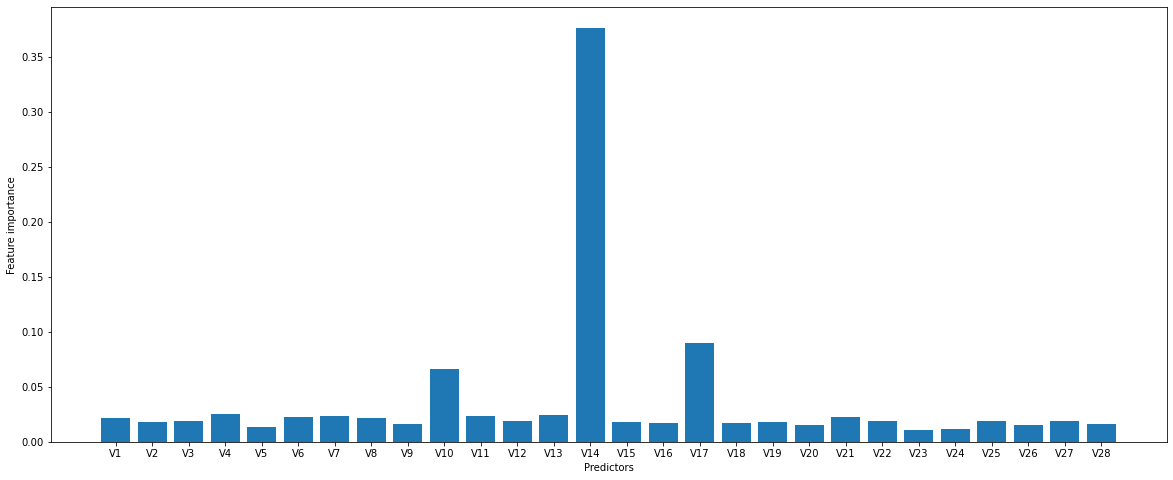

In [80]:
plt.figure(figsize=(20,8))
plt.bar(X_test.columns, xgb_clf.feature_importances_)
plt.xlabel("Predictors")
plt.ylabel("Feature importance")
plt.show()

In [46]:
from sklearn.feature_selection import SelectFromModel

thresholds = np.sort(xgb_clf.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb_clf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    # train model
    selection_model = xgb.XGBClassifier(learning_rate=0.01, 
                                        min_child_weight=3,
                                        n_estimators=1000,
                                        scale_pos_weight=10,
                                        tree_method='hist',
                                        n_jobs=-1,
                                        random_state=11)
    selection_model.fit(select_X_train, y_train)
    
    # evaluate model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    
    auc_score = roc_auc_score(y_test, predictions)
    
    print("Thresh = {} | n = {} | AucScore = {}".format(thresh, select_X_train.shape[1], auc_score*100))

Thresh = 0.010487450286746025 | n = 28 | AucScore = 90.97181527599409
Thresh = 0.011766676791012287 | n = 27 | AucScore = 90.59657896799858
Thresh = 0.013206569477915764 | n = 26 | AucScore = 90.59517188474146
Thresh = 0.01541354414075613 | n = 25 | AucScore = 90.59587542637003
Thresh = 0.015521185472607613 | n = 24 | AucScore = 90.22204620163164
Thresh = 0.016290700063109398 | n = 23 | AucScore = 90.97181527599409
Thresh = 0.016370026394724846 | n = 22 | AucScore = 90.59587542637003
Thresh = 0.016803910955786705 | n = 21 | AucScore = 90.21993557674597
Thresh = 0.01686994545161724 | n = 20 | AucScore = 90.21923203511741
Thresh = 0.018024500459432602 | n = 19 | AucScore = 90.21852849348885
Thresh = 0.018358560279011726 | n = 18 | AucScore = 90.21712141023174
Thresh = 0.018420139327645302 | n = 17 | AucScore = 89.46664879424074
Thresh = 0.01853700540959835 | n = 16 | AucScore = 89.83977447735056
Thresh = 0.01868893764913082 | n = 15 | AucScore = 90.21219661883183
Thresh = 0.0190059840679

In [81]:
feat_imp = pd.DataFrame({'Predictors':list(X_test.columns), 'Feature Importance': list(xgb_clf.feature_importances_)})
feat_imp['pct_rank'] = feat_imp['Feature Importance'].rank(pct=True)

In [85]:
feat_imp = feat_imp.sort_values('pct_rank').reset_index()

In [86]:
feat_imp['pct_rank_numb'] = pd.qcut(feat_imp['pct_rank'], 10, labels=False)

In [87]:
feat_imp

,index,Predictors,Feature Importance,pct_rank,pct_rank_numb
0,22,V23,0.01049,0.03571,0
1,23,V24,0.01177,0.07143,0
2,4,V5,0.01321,0.10714,0
3,25,V26,0.01541,0.14286,1
4,19,V20,0.01552,0.17857,1
5,8,V9,0.01629,0.21429,1
6,27,V28,0.01637,0.25000,2
7,17,V18,0.01680,0.28571,2
8,15,V16,0.01687,0.32143,2
9,1,V2,0.01802,0.35714,3


In [65]:
feat_imp = feat_imp.drop(columns=['prc_rank_numb'])

pct_rank_numb
0    0.10714
1    0.21429
2    0.32143
3    0.39286
4    0.50000
5    0.60714
6    0.67857
7    0.78571
8    0.89286
9    1.00000
Name: pct_rank, dtype: float64

In [93]:
df_max_min_pct = pd.DataFrame({'pct_rank_max':feat_imp.groupby('pct_rank_numb')['pct_rank'].max(),
                               'pct_rank_min':feat_imp.groupby('pct_rank_numb')['pct_rank'].min()})
feat_imp = pd.merge(feat_imp, df_max_min_pct, on=['pct_rank_numb'])
feat_imp.head()

,index,Predictors,Feature Importance,pct_rank,pct_rank_numb,pct_rank_max,pct_rank_min
0,22,V23,0.01049,0.03571,0,0.10714,0.03571
1,23,V24,0.01177,0.07143,0,0.10714,0.03571
2,4,V5,0.01321,0.10714,0,0.10714,0.03571
3,25,V26,0.01541,0.14286,1,0.21429,0.14286
4,19,V20,0.01552,0.17857,1,0.21429,0.14286


In [101]:
from sklearn.feature_selection import SelectFromModel

Thresh = []
n_items = []
aucScore = []

thresholds = np.sort(xgb_clf.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb_clf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    # train model
    selection_model = xgb.XGBClassifier(learning_rate=0.01, 
                                        min_child_weight=3,
                                        n_estimators=1000,
                                        scale_pos_weight=10,
                                        tree_method='hist',
                                        n_jobs=-1,
                                        random_state=11)
    selection_model.fit(select_X_train, y_train)
    
    # evaluate model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    
    auc_score = roc_auc_score(y_test, predictions)
    
    #print("Thresh = {} | n = {} | AucScore = {}".format(thresh, select_X_train.shape[1], auc_score*100))
    
    Thresh.append(thresh)
    n_items.append(select_X_train.shape[1])
    aucScore.append(auc_score*100)
    
result = pd.DataFrame({'Thresh': Thresh, 'n': n_items, 'Auc Score':aucScore})    
    

In [104]:
result.sort_values('Auc Score', ascending=False).head()

,Thresh,n,Auc Score
24,0.02520,4,91.71455
23,0.02397,5,91.33861
22,0.02380,6,91.33720
25,0.06643,3,91.33157
0,0.01049,28,90.97182
